<a href="https://colab.research.google.com/github/mkjubran/ENEE339/blob/master/AM_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Am modulation in the time domain

Import necessary libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

Set the time variable, we will generate the signal from 0 to 2m sec

In [0]:
Tstart=0
Tstop=2e-2
Tstep=1e-4
t=np.arange(Tstart,Tstop,Tstep)


Define the message signal m(t)=$A_m$*cos(2pi$f_m$t)

In [0]:
Am=0.5
fm=100
mt=Am*np.cos(2*math.pi*fm*t)

Plot the signal m(t)

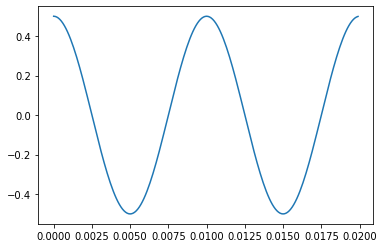

In [278]:
plt.plot(t,mt)

Now, produce the carrier signal c(t)=$A_c$*cos(2pi$f_c$t)

In [0]:
Ac=1
fc=1000
ct=Ac*np.cos(2*math.pi*fc*t)

plot c(t)

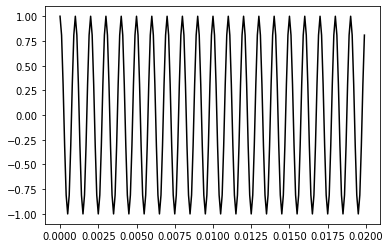

In [280]:
plt.plot(t,ct,'k')

Let us now try to produce the Natural AM modulation signal s(t)=$A_c$[1+$K_a$m(t)]cos(2pi$f_c$t)

In [0]:
Ka=1
st=(1+Ka*mt)*ct


Let us plot the modulated signal s(t)

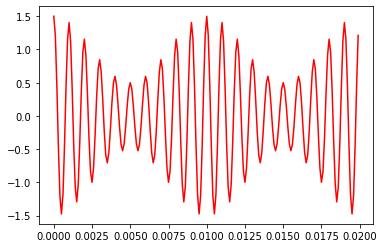

In [282]:
plt.plot(t,st,'r')

Let us try to plot on the same figure A(t)=$A_c$[1+$K_a$m(t)]

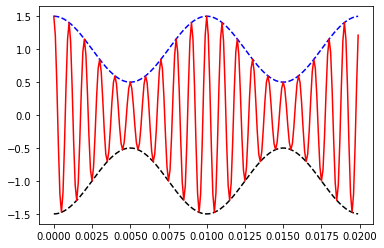

In [283]:
At=np.abs(Ac*(1+Ka*mt))
plt.plot(t,At,'b--')
plt.plot(t,-1*At,'k--')
plt.plot(t,st,'r')

Putting all the code together

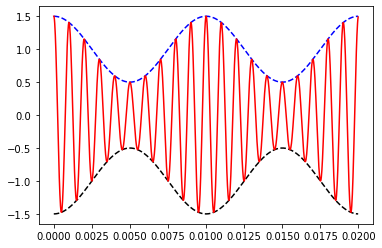

In [284]:
Am=0.5 # amplitude of message signal
fm=100 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal
Ka=1 # amplitude sensitivity

Tstart=0
Tstop=2/fm
Tstep=0.002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # natural AM modulation
At=Ac*(1+Ka*mt)

# plot the signals
At=np.abs(Ac*(1+Ka*mt))
plt.plot(t,At,'b--')
plt.plot(t,-1*At,'k--')
plt.plot(t,st,'r')

As can be seen the dashed blue line which is the envelop of s(t) is a scaled version of the message signal.

Try to change the value of Am and check the envelop signal. Let us try $A_m=1$:

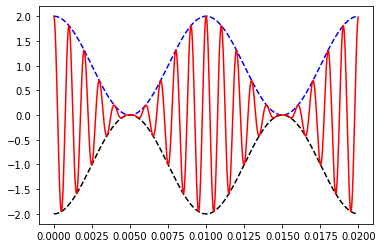

In [285]:
Am=1 # amplitude of message signal
fm=100 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal
Ka=1 # amplitude sensitivity

Tstart=0
Tstop=2/fm
Tstep=0.002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # natural AM modulation
At=Ac*(1+Ka*mt)

# plot the signals
At=np.abs(Ac*(1+Ka*mt))
plt.plot(t,At,'b--')
plt.plot(t,-1*At,'k--')
plt.plot(t,st,'r')

This is called full modulation. This occurs when $A_{min}(t)$=0.

Let us try $A_m=2$:

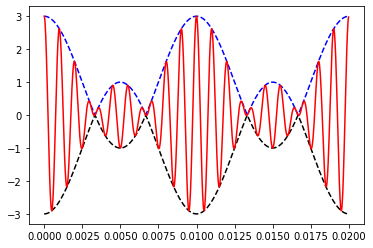

In [286]:
Am=2 # amplitude of message signal
fm=100 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal
Ka=1 # amplitude sensitivity

Tstart=0
Tstop=2/fm
Tstep=0.002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # natural AM modulation
At=Ac*(1+Ka*mt)

# plot the signals
At=np.abs(Ac*(1+Ka*mt))
plt.plot(t,At,'b--')
plt.plot(t,-1*At,'k--')
plt.plot(t,st,'r')

This is called over modulation. In this case, the message signal is not the envelop (dashed blue line) of s(t).

**Exercise**: try different values of $K_a$. what do you observe?

# Am modulation in the frequency domain

Let us define the signals, m(t), c(t), and s(t) as we did in the previous section

In [0]:
Am=1 # amplitude of message signal
fm=1000 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=4000 # fequency of carrier signal
Ka=0.5 # amplitude sensitivity

Tstart=0
Tstop=2000/fm
Tstep=0.08/fm

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # natural AM modulation
At=Ac*(1+Ka*mt)

Let us compute and plot the amplitude spectrum of m(t). In here we will us the np.fft.fft() method.

Text(0, 0.5, 'Amplitude Spectrum (v/Hz)')

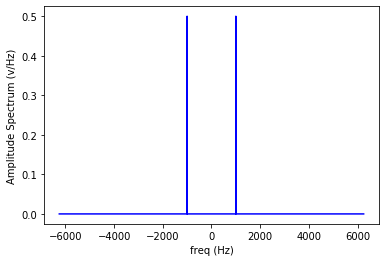

In [288]:
Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
plt.plot(freqs, Mf,'b')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude Spectrum (v/Hz)')

We will also compute and plot the amplitude spectrum of c(t)

Text(0, 0.5, 'Amplitude Spectrum (v/Hz)')

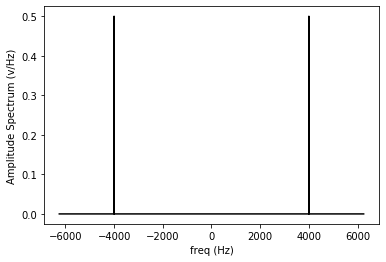

In [289]:
Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
plt.plot(freqs, Cf,'k')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude Spectrum (v/Hz)')

Let us also compute and plot the amplitude spectrum of s(t)

Text(0, 0.5, 'Amplitude Spectrum (v/Hz)')

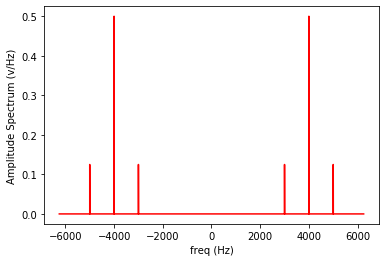

In [290]:
Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
plt.plot(freqs, Sf,'r')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude Spectrum (v/Hz)')

# Natural AM in time and frequency

Let us put all the time and frequency representations code together and try to study the affect of ahcnging any of the signal parameters

Text(0, 0.5, '$S(f)$ (v/Hz)')

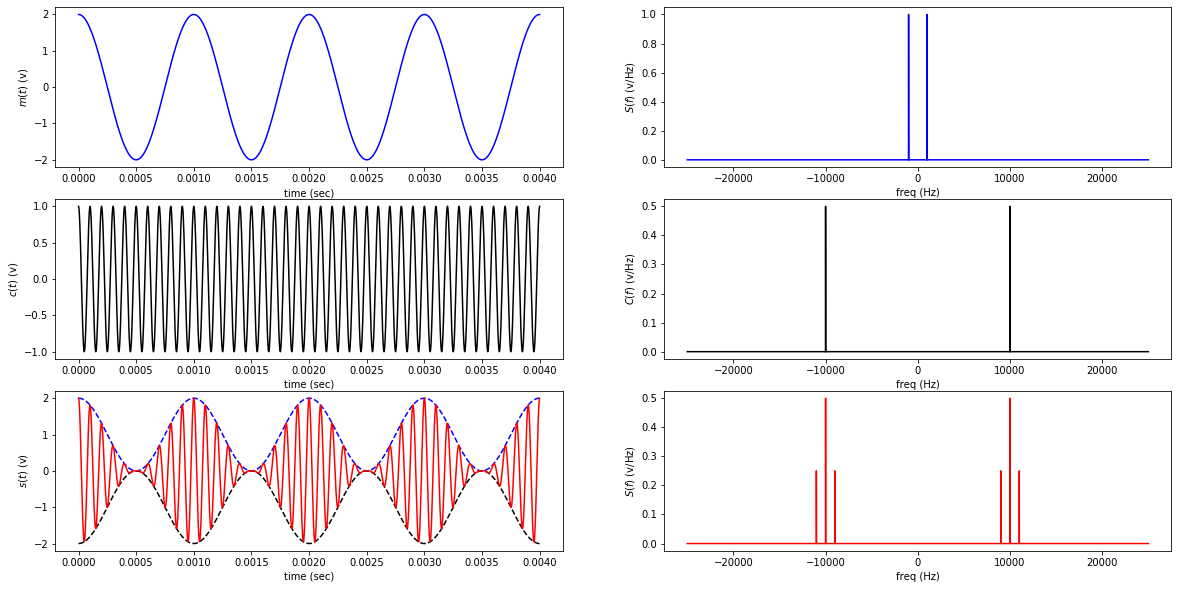

In [291]:
Am=2 # amplitude of message signal
fm=1000 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal
Ka=0.5 # amplitude sensitivity


## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # natural AM modulation
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')


ax3.plot(t,ct,'k')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')


ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=(1+Ka*mt)*ct # natural AM modulation
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')


Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')


Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\
5- $K_a$ \\